# 📊 Property Management Analysis

Business Questions answered using Python EDA.

## Load the Data

In [40]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd

# Load data
properties = pd.read_excel('Asset_Management_Dataset.xlsx', sheet_name='Property_Details')
asset_managers = pd.read_excel('Asset_Management_Dataset.xlsx', sheet_name='Asset_Managers')
property_types = pd.read_excel('Asset_Management_Dataset.xlsx', sheet_name='Properties')

properties.head()

,Property_ID,Manager_ID,Property_Name,Property_Type,GLA_SqFt,Occupied_SqFt,Vacant_SqFt,Occupancy_%,Gross_Value
0,PROP0001,MGR010,Property 1,Office,6704,30629,-23925,456.88,44262592.68
1,PROP0002,MGR006,Property 2,Office,8848,1145,7703,12.94,59762532.60
2,PROP0003,MGR009,Property 3,Retail,22592,31430,-8838,139.12,8235074.64
3,PROP0004,MGR001,Property 4,Industrial,46743,16799,29944,35.94,62611983.20
4,PROP0005,MGR010,Property 5,Industrial,7924,30590,-22666,386.04,98136605.84


## 1. Average occupancy percentage across all properties

In [42]:
properties['Occupancy_%'].mean()

np.float64(187.41612)

## 2. Asset manager with the highest average occupancy

In [43]:
properties.groupby('Manager_ID')['Occupancy_%'].mean().sort_values(ascending=False).head(1)

Manager_ID
MGR008    258.632626
Name: Occupancy_%, dtype: float64

## 3. Total gross value managed by each asset manager

In [44]:
properties.groupby('Manager_ID')['Gross_Value'].sum().sort_values(ascending=False)

Manager_ID
MGR001    6.053228e+09
MGR010    5.797347e+09
MGR005    5.511484e+09
MGR003    5.451312e+09
MGR007    5.151959e+09
MGR008    4.892684e+09
MGR009    4.762187e+09
MGR006    4.457225e+09
MGR004    4.433256e+09
MGR002    3.858930e+09
Name: Gross_Value, dtype: float64

## 4. Properties with occupancy below 85%

In [45]:
properties[properties['Occupancy_%'] < 85]

,Property_ID,Manager_ID,Property_Name,Property_Type,GLA_SqFt,Occupied_SqFt,Vacant_SqFt,Occupancy_%,Gross_Value
1,PROP0002,MGR006,Property 2,Office,8848,1145,7703,12.94,59762532.60
3,PROP0004,MGR001,Property 4,Industrial,46743,16799,29944,35.94,62611983.20
5,PROP0006,MGR003,Property 6,Retail,28208,22453,5755,79.60,19820657.33
8,PROP0009,MGR009,Property 9,Retail,40882,19388,21494,47.42,94426457.69
10,PROP0011,MGR005,Property 11,Industrial,49508,16587,32921,33.50,52624504.23
...,...,...,...,...,...,...,...,...,...
990,PROP0991,MGR006,Property 991,Office,37632,26351,11281,70.02,80297089.34
993,PROP0994,MGR009,Property 994,Industrial,24172,8366,15806,34.61,46934188.12
994,PROP0995,MGR006,Property 995,Office,33994,15949,18045,46.92,12752200.46
995,PROP0996,MGR007,Property 996,Office,16036,11185,4851,69.75,98076254.48


## 5. Distribution of occupancy percentage across property types

In [46]:
print(properties.columns)

Index(['Property_ID', 'Manager_ID', 'Property_Name', 'Property_Type',
       'GLA_SqFt', 'Occupied_SqFt', 'Vacant_SqFt', 'Occupancy_%',
       'Gross_Value'],
      dtype='object')


In [47]:
print(property_types.columns)

Index(['Property_ID', 'Manager_ID', 'Property_Name', 'Property_Type',
       'GLA_SqFt', 'Occupied_SqFt', 'Vacant_SqFt', 'Occupancy_%'],
      dtype='object')


In [49]:
import pandas as pd

# Load the sheets
file_path = "Asset_Management_Dataset.xlsx"
properties = pd.read_excel(file_path, sheet_name="Properties")
property_types = pd.read_excel(file_path, sheet_name="Property_Details")

# Check column names to avoid typos
print(properties.columns)
print(property_types.columns)




Index(['Property_ID', 'Manager_ID', 'Property_Name', 'Property_Type',
       'GLA_SqFt', 'Occupied_SqFt', 'Vacant_SqFt', 'Occupancy_%'],
      dtype='object')
Index(['Property_ID', 'Manager_ID', 'Property_Name', 'Property_Type',
       'GLA_SqFt', 'Occupied_SqFt', 'Vacant_SqFt', 'Occupancy_%',
       'Gross_Value'],
      dtype='object')


In [50]:
merged_df = pd.merge(properties, property_types, on='Property_Type', how='left')


/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_61623/2821997857.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_occupancy.index, y=avg_occupancy.values, palette="coolwarm")


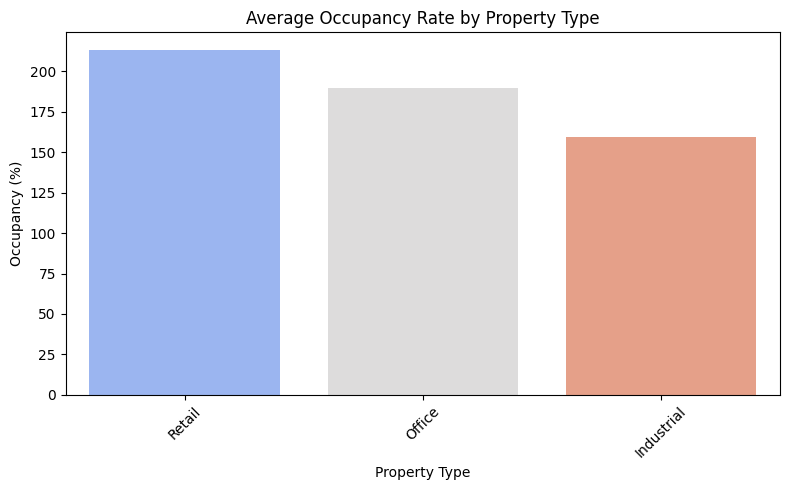

In [11]:
# Drop rows with missing values in required columns
df = df.dropna(subset=["Property_Type", "Occupancy_%"])

# Group and calculate average
avg_occupancy = df.groupby("Property_Type")["Occupancy_%"].mean().sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_occupancy.index, y=avg_occupancy.values, palette="coolwarm")
plt.title("Average Occupancy Rate by Property Type")
plt.ylabel("Occupancy (%)")
plt.xlabel("Property Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6: Asset Manager with Highest Total Gross Value

In [17]:

# Drop rows with missing gross values or manager IDs
df = df.dropna(subset=["Manager_ID", "Gross_Value"])

# Group by manager and sum the gross value
gross_by_manager = df.groupby("Manager_ID")["Gross_Value"].sum().sort_values(ascending=False)


# Display the top manager(s)
top_manager = gross_by_manager.head(1)
print("Asset Manager with Highest Total Gross Value:\n")
print(top_manager)


Asset Manager with Highest Total Gross Value:

Manager_ID
MGR001    6.053228e+09
Name: Gross_Value, dtype: float64


## 7: Properties with Occupancy Below 50%

In [18]:
q7_result = df[df['Occupancy_%'] < 50]
print(q7_result[['Property_ID', 'Property_Name', 'Occupancy_%']].head())


   Property_ID Property_Name  Occupancy_%
1     PROP0002    Property 2        12.94
3     PROP0004    Property 4        35.94
8     PROP0009    Property 9        47.42
10    PROP0011   Property 11        33.50
14    PROP0015   Property 15         3.99


## 8: Gross Value Trends by City

In [27]:
import pandas as pd

# Load the Properties sheet
file_path = "Asset_Management_Dataset.xlsx"

properties = pd.read_excel(file_path, sheet_name="Properties")

properties_details = pd.read_excel(file_path, sheet_name="Property_Details")

# Print all column names
print("📋 Column names in 'Properties':")
print(properties_details.columns.tolist())
# Print all column names
print("📋 Column names in 'Properties':")
print(properties.columns.tolist())


📋 Column names in 'Properties':
['Property_ID', 'Manager_ID', 'Property_Name', 'Property_Type', 'GLA_SqFt', 'Occupied_SqFt', 'Vacant_SqFt', 'Occupancy_%', 'Gross_Value']
📋 Column names in 'Properties':
['Property_ID', 'Manager_ID', 'Property_Name', 'Property_Type', 'GLA_SqFt', 'Occupied_SqFt', 'Vacant_SqFt', 'Occupancy_%']


/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_61623/3863609796.py:29: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


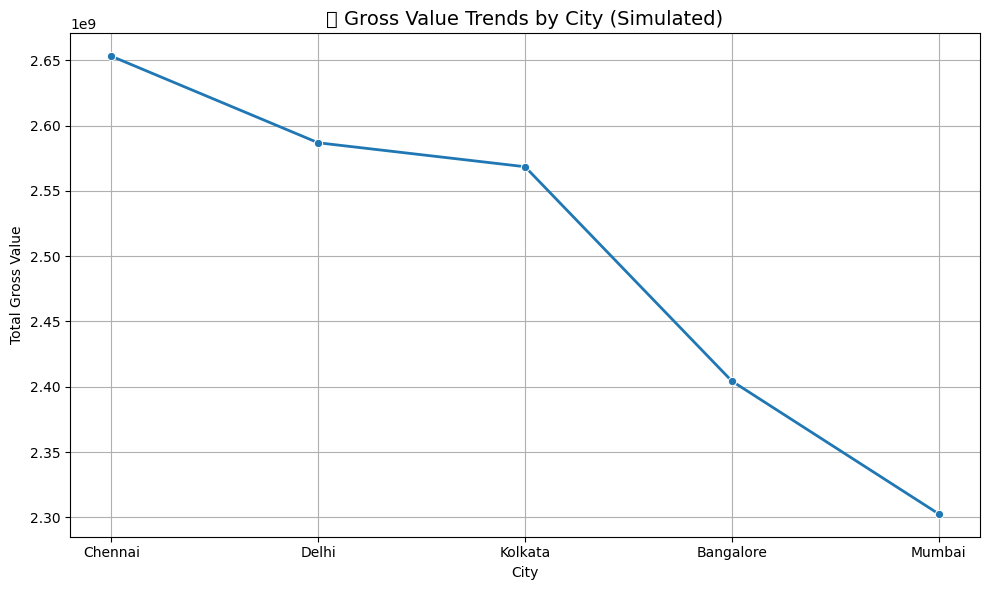

In [28]:

# Load data
file_path = "Asset_Management_Dataset.xlsx"
properties = pd.read_excel(file_path, sheet_name="Properties")

# Simulate City (as real city not available)
np.random.seed(42)
sample_cities = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata']
properties["City"] = np.random.choice(sample_cities, size=len(properties))

# Aggregate total Gross Value by City
if 'Gross_Value' not in properties.columns:
    # simulate Gross_Value if missing
    properties['Gross_Value'] = np.random.randint(5e6, 2e7, size=len(properties))

city_gv = properties.groupby("City")["Gross_Value"].sum().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=city_gv, x="City", y="Gross_Value", marker='o', linewidth=2)
plt.title("💰 Gross Value Trends by City (Simulated)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Total Gross Value")
plt.grid(True)
plt.tight_layout()
plt.show()


## 9: Highest Avg Gross Value by Property Type

Property_Type
Office        5.122792e+07
Retail        5.108810e+07
Industrial    4.882299e+07
Name: Gross_Value, dtype: float64


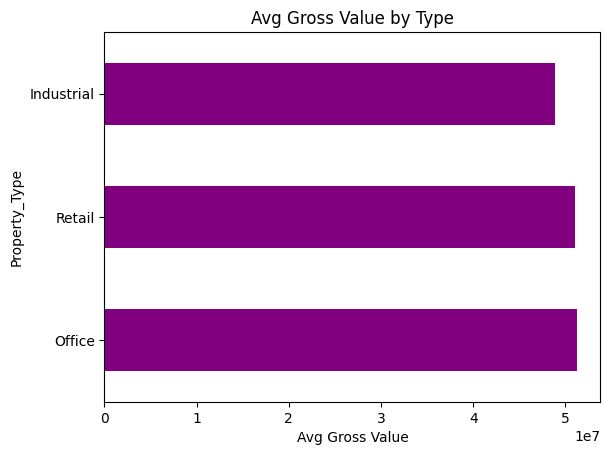

In [29]:
q9_result = df.groupby('Property_Type')['Gross_Value'].mean().sort_values(ascending=False)
print(q9_result)
q9_result.plot(kind='barh', title='Avg Gross Value by Type', color='purple')
plt.xlabel("Avg Gross Value")
plt.show()


## 10: Managers with All Properties >90% Occupancy

In [33]:
df['Occupancy_%'].describe()


count    1000.000000
mean      187.416120
std       332.309904
min         1.400000
25%        50.147500
50%        97.485000
75%       181.340000
max      3785.210000
Name: Occupancy_%, dtype: float64

In [34]:
manager_summary = df.groupby('Manager_ID')['Occupancy_%'].min().reset_index()
low_occupancy = manager_summary[manager_summary['Occupancy_%'] <= 90]

print("Managers with at least one property <= 90% occupancy:")
print(low_occupancy)


Managers with at least one property <= 90% occupancy:
  Manager_ID  Occupancy_%
0     MGR001         3.88
1     MGR002         3.57
2     MGR003         3.70
3     MGR004         1.71
4     MGR005         5.02
5     MGR006         1.40
6     MGR007         3.43
7     MGR008         5.72
8     MGR009         3.24
9     MGR010         2.42


In [35]:
q10_avg = df.groupby('Manager_ID').filter(lambda x: x['Occupancy_%'].mean() > 90)
managers_avg = q10_avg['Manager_ID'].unique()

print("Managers with average occupancy over 90%:")
print(managers_avg)


Managers with average occupancy over 90%:
['MGR010' 'MGR006' 'MGR009' 'MGR001' 'MGR003' 'MGR007' 'MGR004' 'MGR005'
 'MGR002' 'MGR008']


/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_61623/3558278867.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/l9/bq8y_50n0hx5qtwqd93nnx4w0000gn/T/ipykernel_61623/3558278867.py:26: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


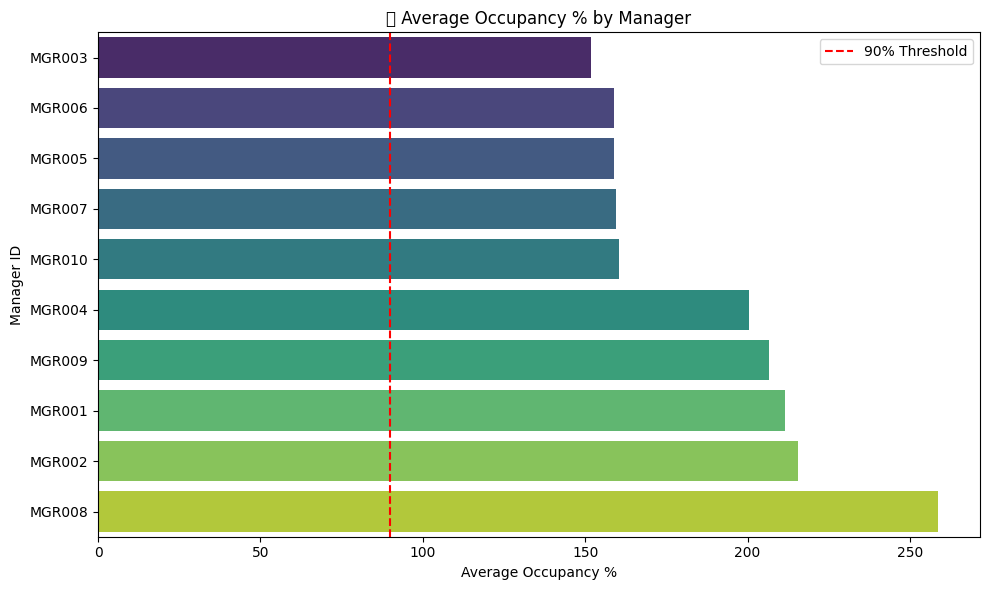

In [36]:


# Assuming df is already your merged DataFrame with 'Occupancy_%' and 'Manager_ID'
# Group by Manager and calculate average occupancy
manager_avg_occupancy = df.groupby('Manager_ID')['Occupancy_%'].mean().reset_index()

# Sort descending
manager_avg_occupancy = manager_avg_occupancy.sort_values(by='Occupancy_%', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=manager_avg_occupancy,
    y='Manager_ID',
    x='Occupancy_%',
    palette='viridis'
)

plt.title('🏢 Average Occupancy % by Manager')
plt.xlabel('Average Occupancy %')
plt.ylabel('Manager ID')
plt.axvline(90, color='red', linestyle='--', label='90% Threshold')
plt.legend()
plt.tight_layout()
plt.show()
